In [204]:
import pandas as pd

weather_df = pd.read_csv('data\Weather.csv')
previous_data = pd.read_csv('humidity.csv')

confirmed_df = pd.read_csv('data\TimeProvince.csv')

In [205]:
weather_df = weather_df.loc[:, ['date', 'province', 'avg_relative_humidity']]
weather_2020 = weather_df['date'].str.contains("2020")
weather_df = weather_df[weather_2020]
previous_data = previous_data.loc[:, ['date', 'province', 'avg_relative_humidity']]

print(weather_df.head())
print(previous_data.head())

             date province  avg_relative_humidity
23375  2020-01-01    Seoul                  64.40
23376  2020-01-01    Busan                  44.00
23377  2020-01-01    Daegu                  53.30
23378  2020-01-01  Gwangju                  58.00
23379  2020-01-01  Incheon                  66.60
         date     province  avg_relative_humidity
0  2020-06-01   Gangwon-do                  40.80
1  2020-06-01   Gangwon-do                  58.10
2  2020-06-01   Gangwon-do                  67.60
3  2020-06-01  Gyeonggi-do                  69.00
4  2020-06-01  Gyeonggi-do                  71.10


In [206]:
weather_df2 = previous_data.groupby(['province', 'date'])['avg_relative_humidity'].mean()
# weather_df2.to_csv('test.csv', mode='w', encoding='utf-8')
weather_df2.head(100)

province           date      
Busan              2020-06-01   66.90
                   2020-06-02   50.80
                   2020-06-03   81.30
                   2020-06-04   78.10
                   2020-06-05   79.60
                                 ... 
Chungcheongbuk-do  2020-06-04   64.34
                   2020-06-05   64.82
                   2020-06-06   60.22
                   2020-06-07   60.82
                   2020-06-08   65.68
Name: avg_relative_humidity, Length: 100, dtype: float64

In [210]:
confirmed_df = confirmed_df.loc[:, ['date', 'province', 'confirmed']]
seoul_confirmed = confirmed_df[['date', 'confirmed']][confirmed_df['province'] == 'Seoul']
seoul_confirmed = seoul_confirmed.reset_index(drop=True)
seoul_confirmed.head()

for i in range(len(seoul_confirmed)-1, 1, -1):
    seoul_confirmed['confirmed'][i] = seoul_confirmed['confirmed'][i] - seoul_confirmed['confirmed'][i-1]
    
seoul_confirmed.tail()

C:\Users\kim4-\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,date,confirmed
128,2020-05-27,19
129,2020-05-28,24
130,2020-05-29,20
131,2020-05-30,9
132,2020-05-31,6


In [219]:
seoul_humidity = weather_df[['date', 'avg_relative_humidity']][weather_df['province'] == 'Seoul']
seoul_humidity = seoul_humidity.reset_index(drop=True)

In [229]:
from datetime import datetime, timedelta

for i in range(len(seoul_humidity)):
    date = datetime.strptime(seoul_humidity['date'][i], 'YYYY-%m-%d')
    date += timedelta(days=5)
    seoul_humidity['date'][i] = date

ValueError: time data '2020-01-01' does not match format 'YYYY-%m-%d'

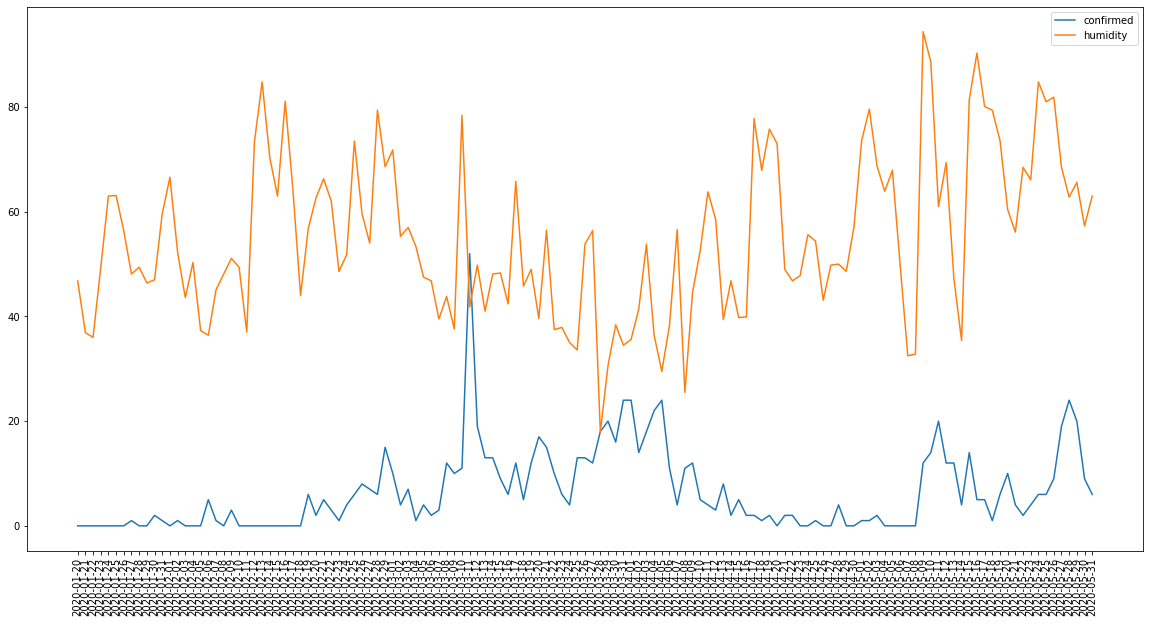

In [215]:
import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = (20, 10)
plt.plot(seoul_confirmed['date'], seoul_confirmed['confirmed'], label='confirmed')
plt.plot(seoul['date'], seoul['avg_relative_humidity'], label = 'humidity')
plt.xticks(rotation = 90)
plt.legend()
plt.show()